In [2]:
pip install numpy pandas scikit-learn matplotlib seaborn yfinance tensorflow


In [3]:
import yfinance as yf

# Download the stock price data (AAPL stock for 5 years)
data = yf.download('AAPL', start='2019-01-01', end='2024-01-01')
print(data.head())


[*********************100%***********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2019-01-02  38.722500  39.712502  38.557499  39.480000  37.750076  148158800
2019-01-03  35.994999  36.430000  35.500000  35.547501  33.989887  365248800
2019-01-04  36.132500  37.137501  35.950001  37.064999  35.440903  234428400
2019-01-07  37.174999  37.207500  36.474998  36.982498  35.362022  219111200
2019-01-08  37.389999  37.955002  37.130001  37.687500  36.036133  164101200


In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.750076,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,33.989887,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.440903,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.362022,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.036133,164101200


In [5]:
data['Price Range'] = data['High'] - data['Low']


In [6]:

data['MA50'] = data['Adj Close'].rolling(window=50).mean()

data['MA200'] = data['Adj Close'].rolling(window=200).mean()

In [7]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Price Range,MA50,MA200
Date,,,,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.750076,148158800,1.155003,NaN,NaN
2019-01-03,35.994999,36.430000,35.500000,35.547501,33.989887,365248800,0.930000,NaN,NaN
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.440903,234428400,1.187500,NaN,NaN
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.362022,219111200,0.732502,NaN,NaN
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.036133,164101200,0.825001,NaN,NaN


In [8]:
data = data.dropna(subset=['MA50', 'MA200'])


In [9]:
data.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
Price Range,0
MA50,0
MA200,0


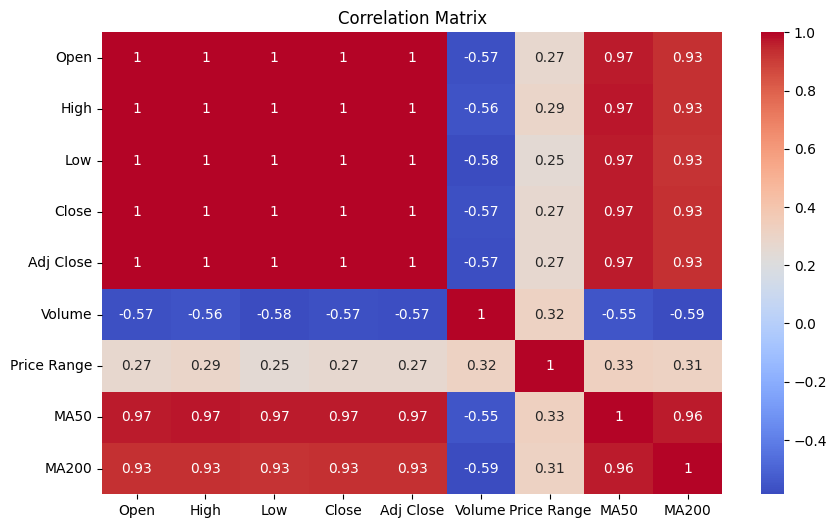

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


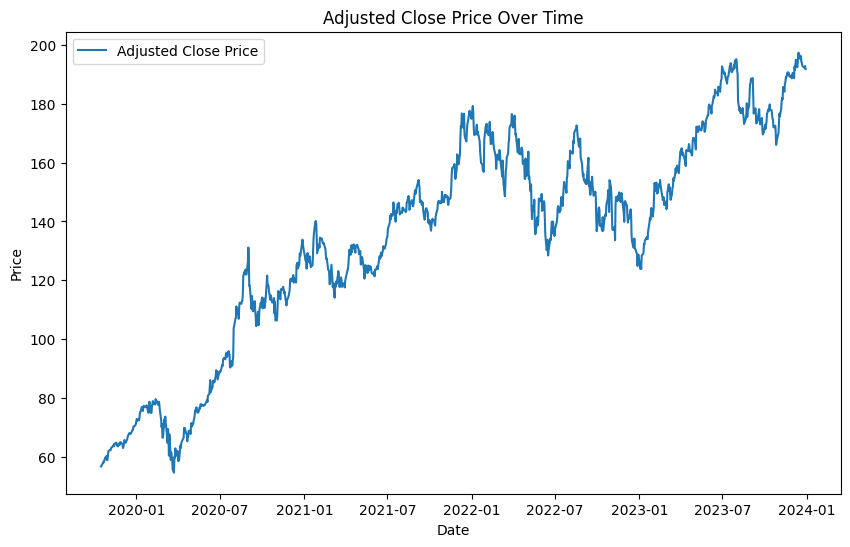

In [11]:

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Adj Close'], label='Adjusted Close Price')
plt.title('Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

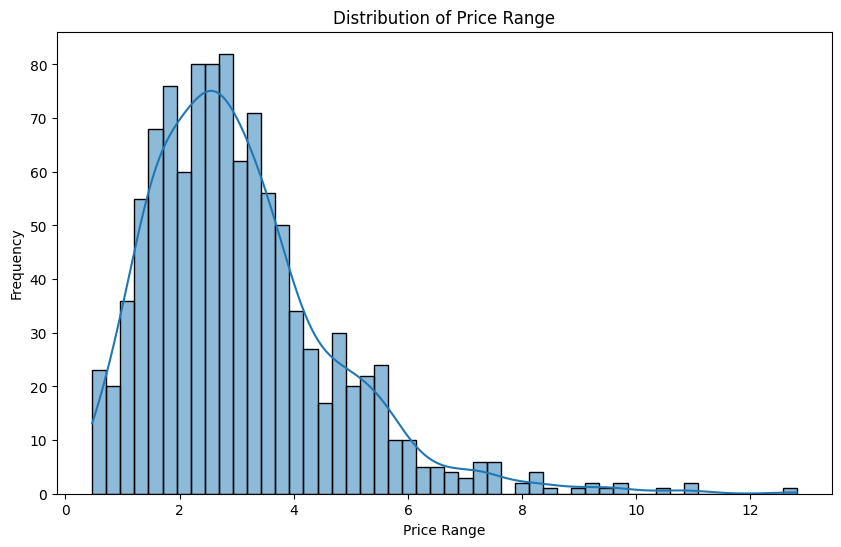

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Price Range'], bins=50, kde=True)
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.show()


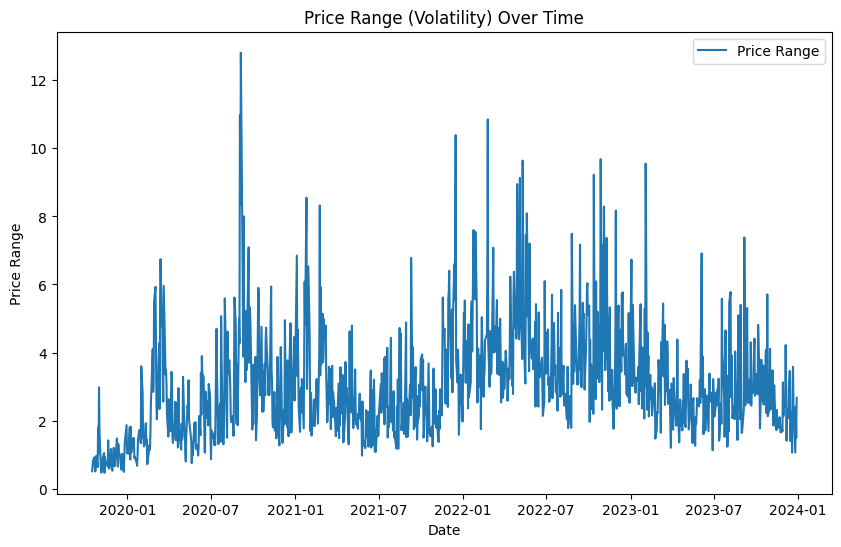

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Price Range'], label='Price Range')
plt.title('Price Range (Volatility) Over Time')
plt.xlabel('Date')
plt.ylabel('Price Range')
plt.legend()
plt.show()


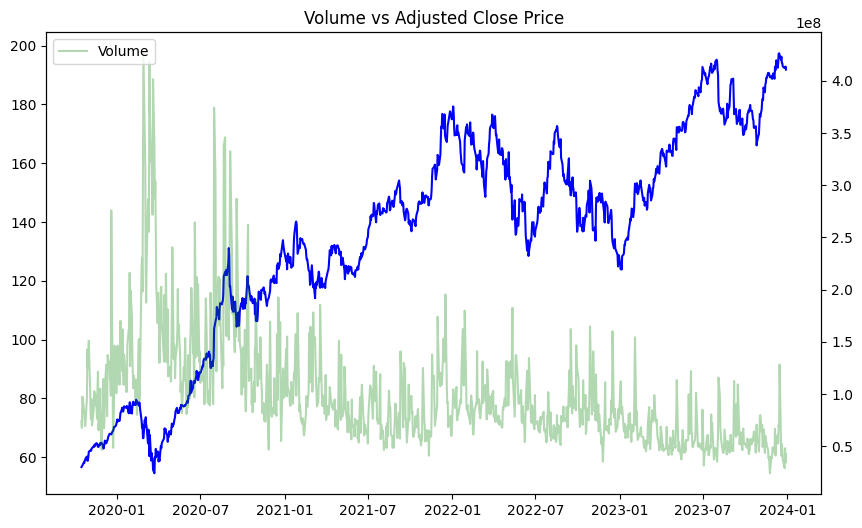

In [14]:

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Adj Close'], label='Adjusted Close', color='b')
plt.twinx()
plt.plot(data.index, data['Volume'], label='Volume', color='g', alpha=0.3)
plt.title('Volume vs Adjusted Close Price')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.show()


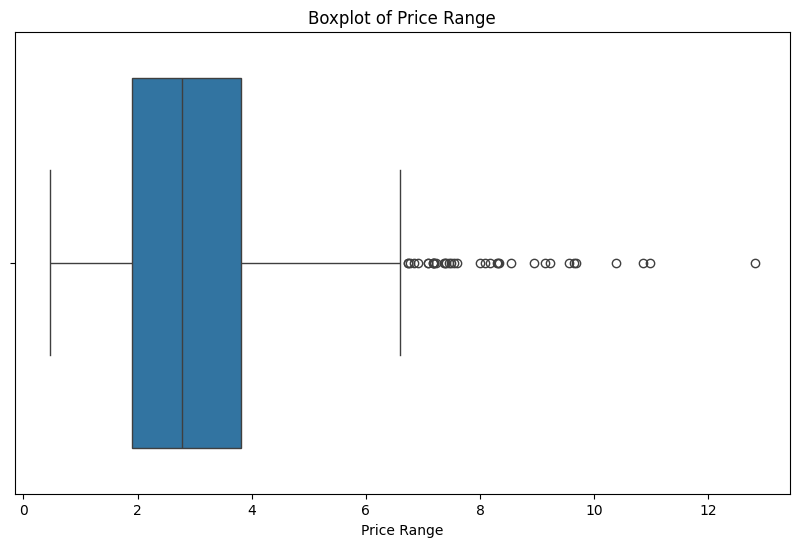

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Price Range'])
plt.title('Boxplot of Price Range')
plt.show()


In [16]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Price Range,MA50,MA200
Date,,,,,,,,,
2019-10-16,58.342499,58.810001,58.299999,58.592499,56.696682,73903200,0.510002,52.283677,46.649351
2019-10-17,58.772499,59.037498,58.380001,58.820000,56.916821,67585200,0.657497,52.462659,46.745184
2019-10-18,58.647499,59.395000,58.572498,59.102501,57.190182,97433600,0.822502,52.625949,46.861186
2019-10-21,59.380001,60.247501,59.330002,60.127499,58.182014,87247200,0.917500,52.817155,46.974891
2019-10-22,60.290001,60.549999,59.904999,59.990002,58.048962,82293600,0.645000,53.008168,47.088326


In [17]:
# Clipping extreme values to the 95th percentile
data['Price Range'] = data['Price Range'].clip(lower=data['Price Range'].quantile(0.05),
                                               upper=data['Price Range'].quantile(0.95))


<ipython-input-17-62ce6b99e021>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price Range'] = data['Price Range'].clip(lower=data['Price Range'].quantile(0.05),


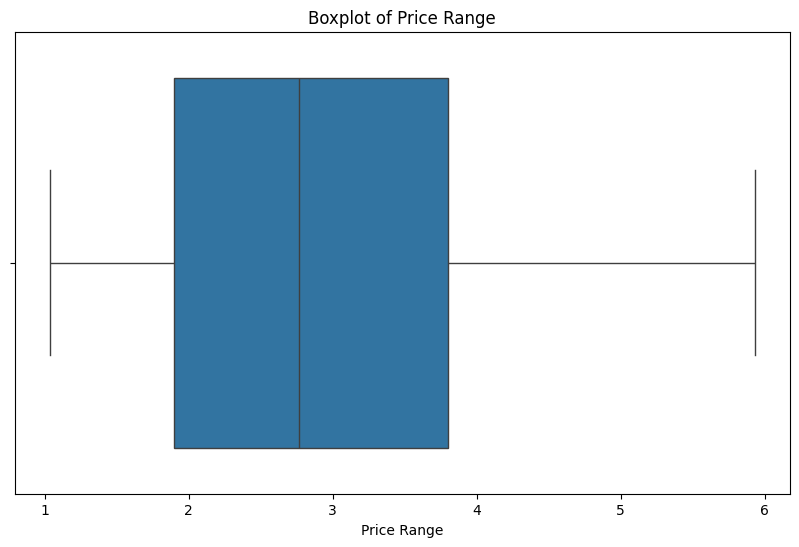

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Price Range'])
plt.title('Boxplot of Price Range')
plt.show()


In [19]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume,Price Range,MA50,MA200
Open,1.000000,0.999341,0.999209,0.998314,0.998199,-0.570640,0.288629,0.968100,0.926429
High,0.999341,1.000000,0.999066,0.999196,0.999042,-0.561447,0.306372,0.969412,0.928451
Low,0.999209,0.999066,1.000000,0.999248,0.999190,-0.582505,0.266742,0.966497,0.925613
Close,0.998314,0.999196,0.999248,1.000000,0.999885,-0.572669,0.284703,0.967465,0.927036
Adj Close,0.998199,0.999042,0.999190,0.999885,1.000000,-0.574815,0.282633,0.968506,0.929586
Volume,-0.570640,-0.561447,-0.582505,-0.572669,-0.574815,1.000000,0.302320,-0.551432,-0.586525
Price Range,0.288629,0.306372,0.266742,0.284703,0.282633,0.302320,1.000000,0.349619,0.338177
MA50,0.968100,0.969412,0.966497,0.967465,0.968506,-0.551432,0.349619,1.000000,0.963741
MA200,0.926429,0.928451,0.925613,0.927036,0.929586,-0.586525,0.338177,0.963741,1.000000


In [20]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Initialize the MinMaxScaler for features
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the features (X), here ['Price Range', 'MA50', 'MA200']
X_scaled = scaler.fit_transform(data[['Price Range', 'MA50', 'MA200']])

# Convert scaled features to a DataFrame for clarity (optional)
X_scaled = pd.DataFrame(X_scaled, columns=['Price Range', 'MA50', 'MA200'])


In [21]:
# Initialize a new MinMaxScaler for the target variable
y_scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the target variable (y), here 'Adj Close'
y_scaled = y_scaler.fit_transform(data[['Adj Close']])


In [22]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)



In [23]:
import numpy as np

# Reshape the data to 3D for LSTM [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [24]:

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Initialize a simpler LSTM model
model = Sequential()

# First LSTM layer with fewer units and Dropout regularization
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Second LSTM layer with fewer units
model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.2))

# Fully connected Dense layer
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(1))  # Predicting a single value (Adj Close)

# Compile the model with a reduced learning rate
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Model summary
model.summary()






/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                       │ (None, 3, 64)               │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 3, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,857 (116.63 KB)

 Trainable params: 29,857 (116.63 KB)

 Non-trainable params: 0 (0.00 B)

Sequential(): Initializes a sequential model, which means layers are added one after the other.
LSTM(units=50): Adds an LSTM layer with 50 units (neurons). This is the memory unit that will capture patterns in the time series. The return_sequences=True allows the LSTM layer to return the entire sequence of output for the next LSTM layer.
Dropout(0.2): This adds dropout regularization to prevent overfitting. 0.2 means that 20% of the neurons are randomly dropped during training.
Dense(1): This adds a fully connected output layer with 1 unit, as we are predicting the adjusted close price (a single value).
model.compile(): Compiles the model with the Adam optimizer and the Mean Squared Error (MSE) loss function, which is commonly used for regression tasks.


In [71]:
# from tensorflow.keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.2)




Epoch 1/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0845 - val_loss: 0.0176
Epoch 2/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0168 - val_loss: 0.0055
Epoch 3/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0115 - val_loss: 0.0142
Epoch 4/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - val_loss: 0.0052
Epoch 5/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - val_loss: 0.0071
Epoch 6/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0097 - val_loss: 0.0060
Epoch 7/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - val_loss: 0.0058
Epoch 8/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - val_loss: 0.0143
Epoch 9/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0097 - val_loss: 0.0066
Epoch 10/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0076 - val_loss: 0.0075
Epoch 11/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - val_loss: 0.0104
Epoch 12/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.

In [72]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Inverse transform the predictions back to the original scale
predictions = y_scaler.inverse_transform(predictions)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


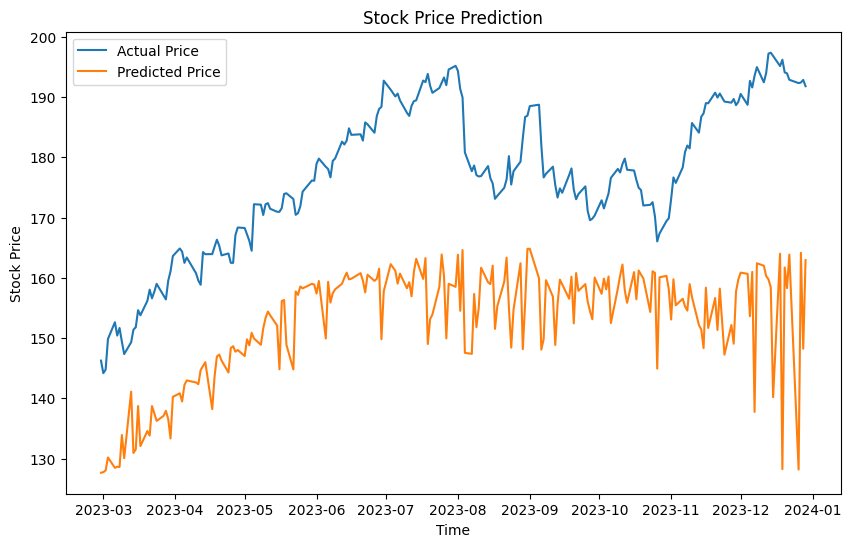

In [73]:
import matplotlib.pyplot as plt

# Plot the predicted and actual values
plt.figure(figsize=(10, 6))
plt.plot(data.index[len(data) - len(y_test):], y_scaler.inverse_transform(y_test), label='Actual Price')
plt.plot(data.index[len(data) - len(predictions):], predictions, label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [74]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_scaler.inverse_transform(y_test), predictions))
print('Root Mean Squared Error:', rmse)


Root Mean Squared Error: 25.855700358044423


In [75]:
percentage_error = (rmse / y_test.mean()) * 100
print(f"Percentage RMSE: {percentage_error}%")

Percentage RMSE: 3020.785565102744%


In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Initialize the GRU model
model = Sequential()

# First GRU layer with Dropout
model.add(GRU(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Second GRU layer with Dropout
model.add(GRU(units=32, return_sequences=False))
model.add(Dropout(0.2))

# Fully connected Dense layer
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(1))  # Predicting a single value (Adj Close)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 3, 64)               │          12,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 3, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 32)                  │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,817 (89.13 KB)

 Trainable params: 22,817 (89.13 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.2)

Epoch 1/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1366 - val_loss: 0.0121
Epoch 2/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0385 - val_loss: 0.0112
Epoch 3/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0305 - val_loss: 0.0104
Epoch 4/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0255 - val_loss: 0.0103
Epoch 5/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0228 - val_loss: 0.0100
Epoch 6/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0239 - val_loss: 0.0085
Epoch 7/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0223 - val_loss: 0.0076
Epoch 8/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0184 - val_loss: 0.0077
Epoch 9/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0165 - val_loss: 0.0075
Epoch 10/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0165 - val_loss: 0.0076
Epoch 11/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0165 - val_loss: 0.0084
Epoch 12/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.

In [78]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Inverse transform the predictions back to the original scale
predictions = y_scaler.inverse_transform(predictions)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


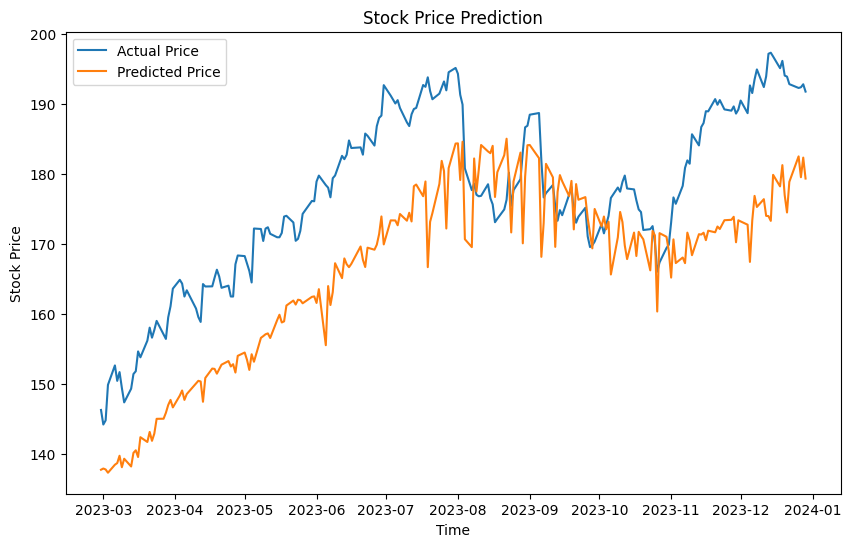

In [79]:
import matplotlib.pyplot as plt

# Plot the predicted and actual values
plt.figure(figsize=(10, 6))
plt.plot(data.index[len(data) - len(y_test):], y_scaler.inverse_transform(y_test), label='Actual Price')
plt.plot(data.index[len(data) - len(predictions):], predictions, label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [80]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_scaler.inverse_transform(y_test), predictions))
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 12.768618172378734


In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input

# Initialize the 1D CNN model
model = Sequential()

# Add Input Layer explicitly
model.add(Input(shape=(X_train.shape[1], 1)))  # Input shape: (sequence_length, num_features)

# First 1D Convolutional layer with padding='same' to maintain input size
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

# Second 1D Convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Fully connected Dense layer
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(1))  # Predicting a single value (Adj Close)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Model summary
model.summary()



Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 3, 64)               │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 1, 32)               │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 0, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 0, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 0)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 16)                  │              16 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,465 (25.25 KB)

 Trainable params: 6,465 (25.25 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.2)

Epoch 1/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.2424 - val_loss: 0.0089
Epoch 2/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0250 - val_loss: 0.0053
Epoch 3/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0243 - val_loss: 0.0056
Epoch 4/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0186 - val_loss: 0.0052
Epoch 5/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0190 - val_loss: 0.0064
Epoch 6/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0196 - val_loss: 0.0069
Epoch 7/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0157 - val_loss: 0.0051
Epoch 8/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0191 - val_loss: 0.0074
Epoch 9/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0137 - val_loss: 0.0066
Epoch 10/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0155 - val_loss: 0.0051
Epoch 11/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0144 - val_loss: 0.0053
Epoch 12/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.

In [92]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Inverse transform the predictions back to the original scale
predictions = y_scaler.inverse_transform(predictions)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


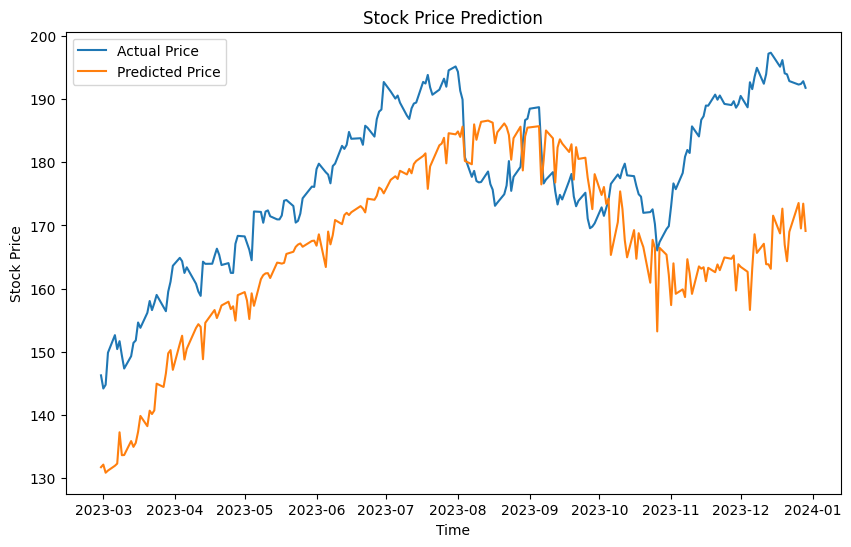

In [94]:
import matplotlib.pyplot as plt

# Plot the predicted and actual values
plt.figure(figsize=(10, 6))
plt.plot(data.index[len(data) - len(y_test):], y_scaler.inverse_transform(y_test), label='Actual Price')
plt.plot(data.index[len(data) - len(predictions):], predictions, label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [95]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_scaler.inverse_transform(y_test), predictions))
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 14.396740197727697


In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Initialize the Dense model
model = Sequential()

# Adding Dense layers
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(1))  # Predicting a single value (Adj Close)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                     │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,369 (9.25 KB)

 Trainable params: 2,369 (9.25 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:

history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.2)

Epoch 1/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0040 - val_loss: 0.0115
Epoch 2/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039 - val_loss: 0.0102
Epoch 3/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0040 - val_loss: 0.0124
Epoch 4/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0041 - val_loss: 0.0124
Epoch 5/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0043 - val_loss: 0.0110
Epoch 6/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039 - val_loss: 0.0115
Epoch 7/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039 - val_loss: 0.0121
Epoch 8/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0041 - val_loss: 0.0085
Epoch 9/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0041 - val_loss: 0.0087
Epoch 10/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0040 - val_loss: 0.0107
Epoch 11/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0041 - val_loss: 0.0123
Epoch 12/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0

In [93]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Inverse transform the predictions back to the original scale
predictions = y_scaler.inverse_transform(predictions)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


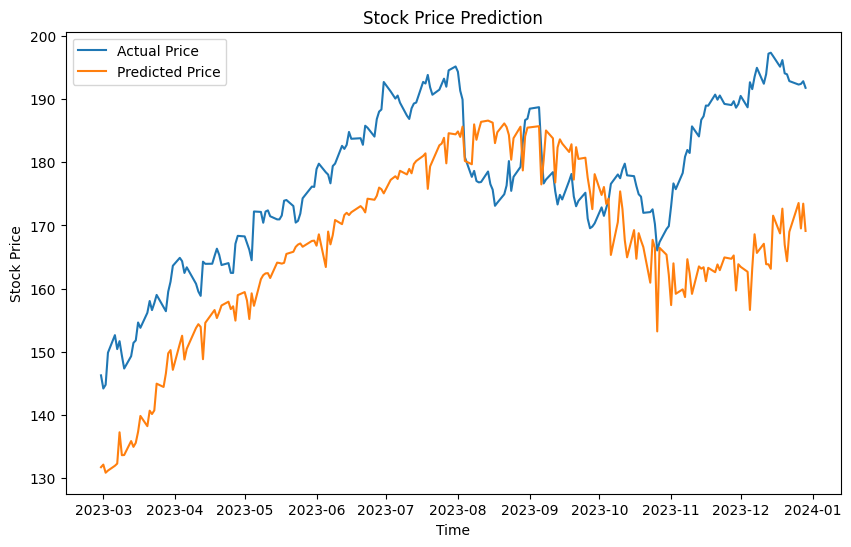

In [96]:
import matplotlib.pyplot as plt

# Plot the predicted and actual values
plt.figure(figsize=(10, 6))
plt.plot(data.index[len(data) - len(y_test):], y_scaler.inverse_transform(y_test), label='Actual Price')
plt.plot(data.index[len(data) - len(predictions):], predictions, label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [97]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_scaler.inverse_transform(y_test), predictions))
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 14.396740197727697
